# Assignment 03 - Valeria Arce - 101462436

The following assignment is divided in two parts:
- Part A: Run the cells that have already been coded for you to see and understand how Convolution 2D kernel works and, at the end, respond to the questions 1a, 1b, 2a, 2b
- Part B:  Run the cells that have already been coded for you to train the given Neural Network and then respond to the questions 03 to 10 in your video

**Note:**

Coding: 5%
video presentation: 5%
Total: 10%
But without YouTube presentation you receive no mark for the submission. In short, only submissions with YouTube link will be marked.

# PART A

## Image Convolution

In [20]:
# Import the necessary packages and libraries
import numpy as np
from PIL import Image
from scipy import misc
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from io import BytesIO

## Import the image

In [21]:
# Get the image from the URL
response = requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTAHCp2ppBbfcPk9S5nE8gFFsZpDh0Exv9qUKXjehk_QszZHsV_pw&s')

In [22]:
# Visualize the content of the response
print(response.content)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x12\x13\x12\x15\x13\x13\x12\x16\x16\x15\x15\x17\x17\x16\x15\x17\x18\x17\x17\x17\x17\x17\x17\x15\x15\x16\x17\x15\x17\x15\x19\x19\x1d( \x18\x1b&\x1b\x15\x15!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1a\x10\x10\x1b-&\x1e%--------------------+--//--------/----------------\xff\xc0\x00\x11\x08\x00\x8c\x01g\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x04\x05\x06\x01\x07\x08\xff\xc4\x00L\x10\x00\x02\x00\x03\x05\x04\x06\x06\x05\t\x06\x05\x05\x01\x00\x00\x01\x02\x00\x03\x11\x04\x05\x12!1\x06AQq\x07\x13a\x81\x91\xa1"2Br\xb1\xc1#R\xd1\xe1\xf03Cb\x82\x92\xa2\xb2\xc2\xd2\x08\x14DSs\x93\x16\x17ET\xf14c\xa3\xb3\xe2\x15\xff\xc4\x00\x1b\x01\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x00<\x11\x00\x02\x01\x02\x02\x06\x06\n\x00\x04\x07\x01\x00\x00\x00\

In [23]:
# BytesIO() buffers the image into the RAM
# Image.open() opens the buffered image
# np.array() transforms the image into a 3D array containing values from 0-255 corresponding to the RGB colour channels
input_img_arr = np.array(Image.open(BytesIO(response.content)))

## First let’s see the Image.




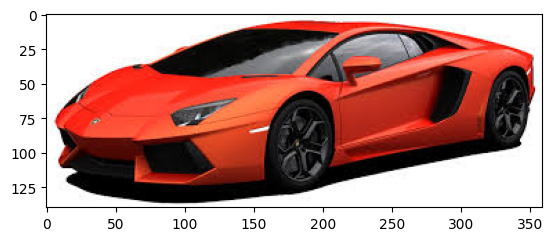

In [24]:
# Plot the resulting image from the array
plt.imshow(input_img_arr)

In [25]:
# Print the array shape
print(input_img_arr.shape)

# Compare the values of colour channels 0 and 1
print(np.array_equal(
        input_img_arr[:, :, 0],
        input_img_arr[:, :, 1]))

# Compare the values of colour channels 1 and 2
print(np.array_equal(
        input_img_arr[:, :, 1],
        input_img_arr[:, :, 2]))

(140, 359, 3)
False
False


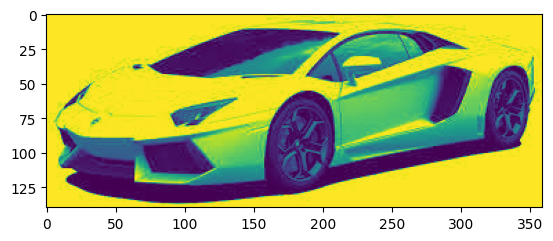

In [26]:
# Save the colour channel 0 in to the input_img_arr array variable and print it
input_img_arr = input_img_arr[:, :, 0]
plt.imshow(input_img_arr)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
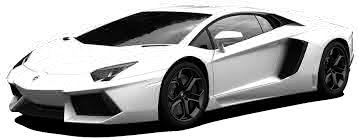

In [27]:
# Visualize the values inside of the resulting array
input_img_arr[:, :]

## Convolution with 2-D Kernels

**How** Convolution works?
https://miro.medium.com/max/790/1*1okwhewf5KCtIPaFib4XaA.gif

In [28]:
# Create a padded array by adding 2 rows and 2 columns (one of each at the beginning and another of each at the end)
padded_array = np.pad(input_img_arr, (1, 1), 'constant')

# Create the kernel
kernel = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])

#Create an output array filled with zeros with the same shape of input_img_arr
output_array = np.zeros(input_img_arr.shape)

In [29]:
#Compare both arrays
print("Original array shape:",input_img_arr.shape)
print("Padded array shape:",padded_array.shape)

Original array shape: (140, 359)
Padded array shape: (142, 361)


In [30]:
#Apply the kernel to the array values
for i in range(padded_array.shape[0]-2):
    for j in range(padded_array.shape[1]-2):
        temp_array = padded_array[i:i+3, j:j+3]
        output_array[i, j] = np.sum(temp_array*kernel)

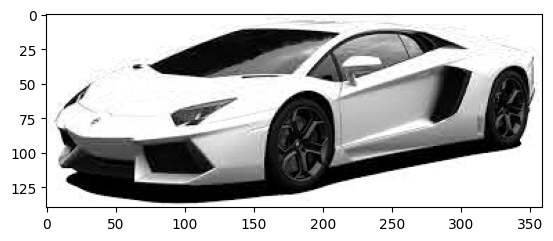

In [31]:
#Plot the resulting array
plt.imshow(output_array, cmap = plt.get_cmap('gray'))

## Standard Convolution

In [32]:
# Define a function to trim out the values between 0-255 range.
# This function will be called in the following function since the resulting array values can be negative or greater than 255
def squash_pixel_value(value):
    if value < 0:
        return 0
    elif value < 255:
        return value
    else:
        return 255

In [33]:
#Define a function to apply a Conv 2D Kernel to an image
def conv_2d_kernel(image_array_2d, kernel, squash_pixels = True):
    padded_array = np.pad(image_array_2d, (1, 1), 'constant')

    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]

    transformed_array = np.zeros(image_array_2d.shape)

    for i in range(padded_array.shape[0] - kernel_width + 1):
        for j in range(padded_array.shape[1] - kernel_height + 1):
            temp_array = padded_array[i:i+kernel_width, j:j+kernel_height]
            if squash_pixels:
                transformed_array[i, j] = squash_pixel_value(np.sum(temp_array*kernel))
            else:
                transformed_array[i, j] = np.sum(temp_array*kernel)
    return transformed_array

## Line detection
With image convolutions, you can easily detect lines. Here are four convolutions to detect horizontal, vertical and lines at 45 degrees:

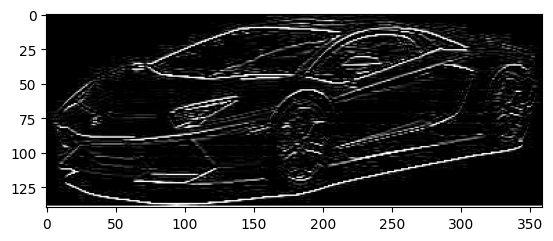

In [34]:
#Create a kernel to detect horizontal lines
horizontal_kernel = np.array([[-1, -1, -1],
                              [2, 2, 2],
                              [-1, -1, -1]])

#Apply the kernel to the image
transf_horizontal = conv_2d_kernel(input_img_arr, kernel = horizontal_kernel)

#Plot the resulting image
plt.imshow(transf_horizontal, cmap = plt.get_cmap('gray'))

### Questions 01-a and 01-b

#### 01-a: Based on the kernels represented on the above image, create a kernel to detect 45 degree lines using convolution, apply to the car's image and plot the result

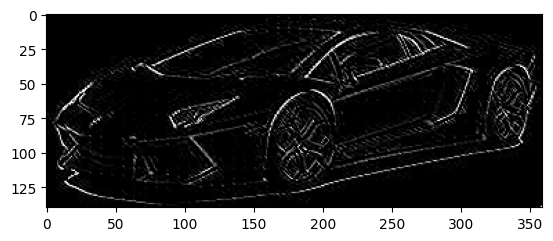

In [45]:
diagonal_45_kernel = np.array([[2, -1, -1],
                               [-1, 2, -1],
                               [-1, -1, 2]])

#Apply the kernel to the image
transf_45deg = conv_2d_kernel(input_img_arr, kernel=diagonal_45_kernel)

#Plot the resulting image
plt.imshow(transf_45deg, cmap=plt.get_cmap('gray'))

#### 01-b: Based on the kernels represented on the above image, create a kernel to detect 135 degree lines using convolution, apply to the car's image and plot the result

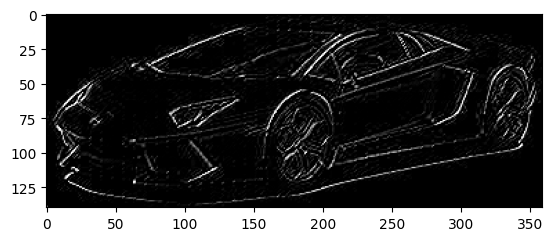

In [46]:
diagonal_135_kernel = np.array([[-1, -1, 2],
                                 [-1, 2, -1],
                                 [2, -1, -1]])

#Apply the kernel to the image
transf_135deg = conv_2d_kernel(input_img_arr, kernel=diagonal_135_kernel)

#Plot the resulting image
plt.imshow(transf_135deg, cmap=plt.get_cmap('gray'))

## Edge Detection

### Question 02: Apply the following kernels to your image and plot the output

#### 02-a:

In [47]:
edge_kernel_1 = np.array([[1, 0, -1],
                          [0, 0, 0],
                          [-1, 0, 1]])

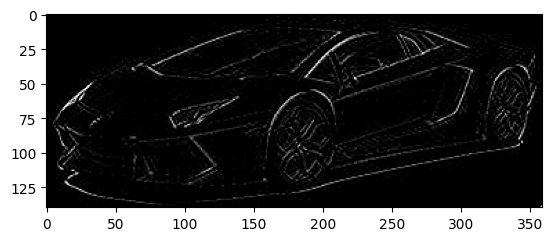

In [48]:
# Apply edge detection kernel 1
transf_edge_1 = conv_2d_kernel(input_img_arr, kernel=edge_kernel_1)

# Plot the result
plt.imshow(transf_edge_1, cmap=plt.get_cmap('gray'))

#### 02-b:

In [49]:
edge_kernel_2 = np.array([[0, 1, 0],
                          [1, -4, 1],
                          [0, 1, 0]])

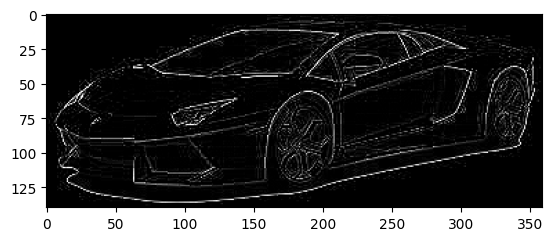

In [50]:
# Apply edge detection kernel 2
transf_edge_2 = conv_2d_kernel(input_img_arr, kernel=edge_kernel_2)

# Plot the result
plt.imshow(transf_edge_2, cmap=plt.get_cmap('gray'))

#### 02-c:

In [51]:
edge_kernel_3 = np.array([[-1, -1, -1],
                          [-1, 8, -1],
                          [-1, -1, -1]])

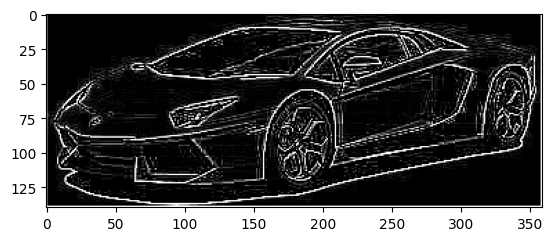

In [52]:
# Apply edge detection kernel 3
transf_edge_3 = conv_2d_kernel(input_img_arr, kernel=edge_kernel_3)

# Plot the result
plt.imshow(transf_edge_3, cmap=plt.get_cmap('gray'))

# PART B

## Importing Libraries

In [53]:
# Import the necessary packages and libraries
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.constraints import max_norm
from keras.datasets import cifar10

## Preparing the dataset

Read more about cifar10 dataset here
https://www.cs.toronto.edu/~kriz/cifar.html

In [54]:
#load the dataset
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()

In [55]:
# one hot encode target values
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

# convert from integers to floats
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# normalize to range 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

## Building the neural network model

In [56]:
# Create the model
model = keras.Sequential([
          keras.layers.Conv2D(32, (3,3), padding='same',
                              activation='relu',
                              kernel_constraint=max_norm(3),
                              input_shape=(32, 32, 3)),
          keras.layers.MaxPooling2D((2, 2)),
          keras.layers.Flatten(),
          keras.layers.Dense(128, activation='relu'),
          keras.layers.Dense(10, activation='softmax'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
# Model compilation
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
# Display a summary of the model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,050,890 (4.01 MB)

 Trainable params: 1,050,890 (4.01 MB)

 Non-trainable params: 0 (0.00 B)

## CustomCallback class for logging

In [7]:
# Create a Custom Callback class to be called during the training
class CustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(epoch % 5 ==0):
      print(" Finished epoch #",epoch)
      print('Accuracy resched train is',logs.get('accuracy'))
      print('Accuracy reached val is',logs.get('val_accuracy'))
      print()
      return

In [8]:
# Instantiate the Custom Callback
cc=CustomCallback()

## Training the Nework

In [61]:
# Train the Network with train_images and train_labels
history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

 Finished epoch # 0
Accuracy resched train is 0.38773998618125916
Accuracy reached val is 0.46549999713897705

 Finished epoch # 5
Accuracy resched train is 0.6272799968719482
Accuracy reached val is 0.5738000273704529

 Finished epoch # 10
Accuracy resched train is 0.6910799741744995
Accuracy reached val is 0.6262000203132629

 Finished epoch # 15
Accuracy resched train is 0.7348600029945374
Accuracy reached val is 0.6553999781608582

 Finished epoch # 20
Accuracy resched train is 0.7716000080108643
Accuracy reached val is 0.6456000208854675

 Finished epoch # 25
Accuracy resched train is 0.8016200065612793
Accuracy reached val is 0.6585000157356262

 Finished epoch # 30
Accuracy resched train is 0.8308600187301636
Accuracy reached val is 0.6395999789237976

 Finished epoch # 35
Accuracy resched train is 0.8560199737548828
Accuracy reached val is 0.646399974822998

 Finished epoch # 40
Accuracy resched train is 0.8812400102615356
Accuracy reached val is 0.6571999788284302

 Finished e

## Plotting the Results

In [64]:
# Define a function to plot the results
def result_plotting():
  plt.figure(figsize=[8,6])
  plt.plot(history.history['accuracy'],'blue',linewidth=3.0)
  plt.plot(history.history['val_accuracy'],'red',ls='--',linewidth=3.0)
  plt.legend(['Training Accuracy','Validaion Accuracy'],fontsize=18,loc='lower right')
  plt.xlabel('Epochs',fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.title('Accuracy Curves',fontsize=16)

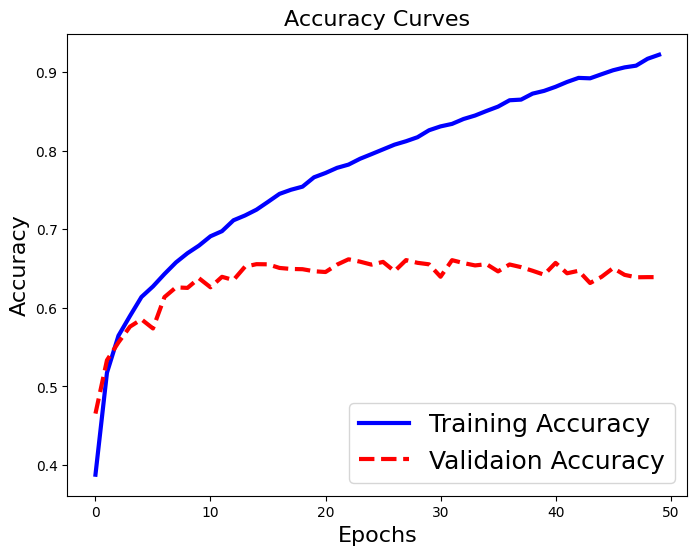

In [65]:
# Call the result_plotting() function
result_plotting()

### Questions 03 to 10

#### 03: Did the network present signs of overfitting? If so, in which epoch?

Answer: Yes, the network shows clear signs of overfitting starting around epoch 25.

#### 04: Write down how many layers this model has and identify their types

Answer: 5 Layers:
1. Convo2D - Convolutional Layer
2. MaxPooling2D - Pooling Layer
3. Flatten - Flatten Layer
4. Dense (128 Units) - Fully Connected (Dense) Layer
5. Dense (10 Units) - Output Layer

#### 05: Briefly explain what is the purpose of each of those layers

Answer:
1. Convo2D - Convolutional Layer
Purpose: Extracts local patterns such as edges, textures, or simple shapes from the input image using learnable filters.
2. MaxPooling2D - Pooling Layer
Purpose: Reduces the spatial dimensions (width & height) of the feature maps while keeping the most important information (max values).
3. Flatten - Flatten Layer
Purpose: Converts the 2D output from the convolutional layers into a 1D vector to pass it into dense layers.
4. Dense (128 Units) - Fully Connected (Dense) Layer
Purpose: Learns complex patterns and relationships in the flattened data.
5. Dense (10 Units) - Output Layer
Purpose: Produces the final classification output using Softmax activation, one probability score for each of the 10 CIFAR-10 classes.

#### 06: Add one or more Convolution layers to your model and run it again.

> Hint: Don't modify the given code. Instead, copy and paste the given code below, then:
1. modify it to answer the current question
2.  run the cell below containing the fucntions ```model.compile()``` and ```model.fit()```.
3. once the training is complete, run the following cell containing the ```result_plotting()``` function

In [14]:
# extra Conv2D layers
model = keras.Sequential([
    # First Convolution Block
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', kernel_constraint=max_norm(3), input_shape=(32, 32, 3)),
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', kernel_constraint=max_norm(3)),
    keras.layers.MaxPooling2D((2, 2)),

    # Second Convolution Block
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', kernel_constraint=max_norm(3)),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', kernel_constraint=max_norm(3)),
    keras.layers.MaxPooling2D((2, 2)),

    # Flatten and Dense Layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])



In [15]:
# Compile your new model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Neural Network with your new model
history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

 Finished epoch # 0
Accuracy resched train is 0.4196400046348572
Accuracy reached val is 0.5009999871253967

 Finished epoch # 5
Accuracy resched train is 0.7687000036239624
Accuracy reached val is 0.7121000289916992

 Finished epoch # 10
Accuracy resched train is 0.8770599961280823
Accuracy reached val is 0.7289000153541565

 Finished epoch # 15
Accuracy resched train is 0.9607200026512146
Accuracy reached val is 0.7276999950408936

 Finished epoch # 20
Accuracy resched train is 0.9798799753189087
Accuracy reached val is 0.7263000011444092

 Finished epoch # 25
Accuracy resched train is 0.9835600256919861
Accuracy reached val is 0.714900016784668

 Finished epoch # 30
Accuracy resched train is 0.9824600219726562
Accuracy reached val is 0.7193999886512756

 Finished epoch # 35
Accuracy resched train is 0.9879599809646606
Accuracy reached val is 0.725600004196167

 Finished epoch # 40
Accuracy resched train is 0.991919994354248
Accuracy reached val is 0.7166000008583069

 Finished epoch

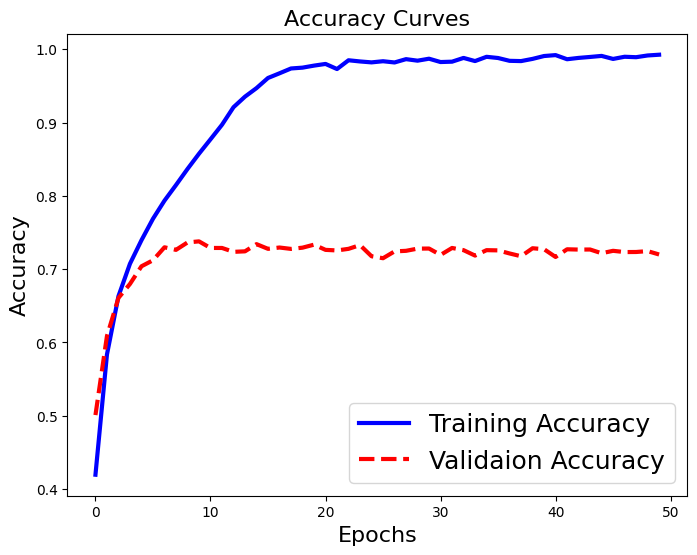

In [16]:
# Call the result_plotting() to display the results from your code
result_plotting()

#### 07: Compare the results between the orinal model made using keras.Sequential VS the bigger model with at least 1 extra layer added.  Describe what are the differences between them.

Answer: The bigger model performs better overall, achieving higher validation accuracy and better generalization. While both models show overfitting after a point, the deeper model learns more complex features and handles the CIFAR-10 dataset more effectively.

#### 08: Add a dropout layer to your model, run it, and compare the result with the previous one.

> Hint 1: Here is a good explanation on how dropouts work https://www.youtube.com/watch?v=bRyOi0L6Rs8

> Hint 2: Don't modify the given code. Instead, copy and paste the given code below, then:
1. Modify it to add a dropout layer
2. Run the cell below containing the fucntions ```model.compile()``` and ```model.fit()```.
3. Once the training is complete, run the following cell containing the ```result_plotting()``` function




In [17]:
from keras.layers import Dropout

# Create model with dropout layer
model = keras.Sequential([
    # First Convolution Block
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', kernel_constraint=max_norm(3), input_shape=(32, 32, 3)),
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', kernel_constraint=max_norm(3)),
    keras.layers.MaxPooling2D((2, 2)),

    # Second Convolution Block
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', kernel_constraint=max_norm(3)),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', kernel_constraint=max_norm(3)),
    keras.layers.MaxPooling2D((2, 2)),

    # Flatten + Dropout + Dense Layers
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),  # Dropout layer to reduce overfitting
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [18]:
# Compile your new model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Neural Network with your new model
history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    batch_size=256,
                    verbose=0,
                    validation_data=(test_images,test_labels),
                    callbacks=[cc])

 Finished epoch # 0
Accuracy resched train is 0.40046000480651855
Accuracy reached val is 0.5213000178337097

 Finished epoch # 5
Accuracy resched train is 0.72434002161026
Accuracy reached val is 0.7282000184059143

 Finished epoch # 10
Accuracy resched train is 0.8004000186920166
Accuracy reached val is 0.7520999908447266

 Finished epoch # 15
Accuracy resched train is 0.8498200178146362
Accuracy reached val is 0.7875000238418579

 Finished epoch # 20
Accuracy resched train is 0.8815799951553345
Accuracy reached val is 0.7867000102996826

 Finished epoch # 25
Accuracy resched train is 0.9023200273513794
Accuracy reached val is 0.7914000153541565

 Finished epoch # 30
Accuracy resched train is 0.9173799753189087
Accuracy reached val is 0.7908999919891357

 Finished epoch # 35
Accuracy resched train is 0.9268400073051453
Accuracy reached val is 0.7886000275611877

 Finished epoch # 40
Accuracy resched train is 0.9366999864578247
Accuracy reached val is 0.7975000143051147

 Finished epo

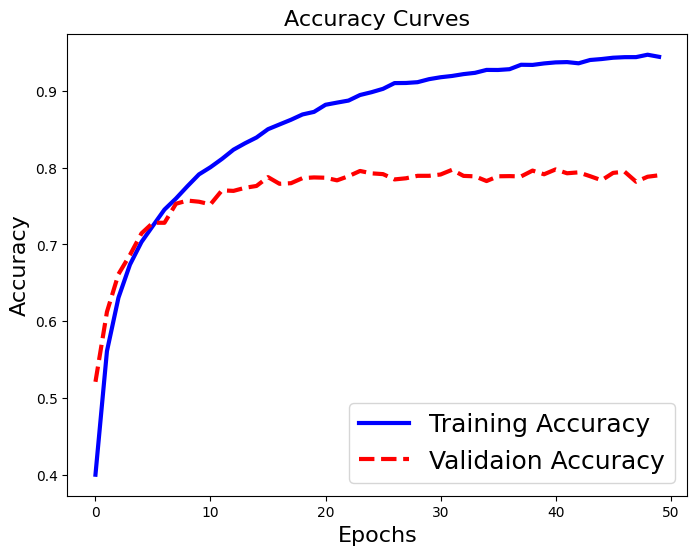

In [19]:
# Call the result_plotting() to display the results from your code
result_plotting()

#### 09: Explain with your own words what is the purpose of a dropout layer and how it works. And briefly explain in your video in your own words.

Answer: A dropout layer is used to prevent overfitting in neural networks. During training, it randomly disables some of the neurons so the model can’t become too dependent on any one feature. This encourages the model to learn better, more general patterns.

Submission Instructions:
- YOU MUST SUBMIT A LINK TO YOUR ONLINE VIDEO (Youtube, Vimeo, etc) as a COMENTS SUBMISSION SECTION on your D2L SUBMISSION. Omitting this comment will result in a 0% for your total mark. Video should be between 5-15 minutes. Please remember to make your video unlisted or public, but it cannot be private. Please verify it's accessible using an incongito tab.  (5%)

- The Assignment03 **ipynb file** that contains all the code. (5%)
